### Import

In [21]:
from astrosceni.image import Image
from astrosceni.stars_filter import StarsFilter
from astrosceni.mufinder import MuFinder
from matplotlib import pyplot as plt
import numpy as np

# Image Class

### Importing images and cropping them

In [22]:
nb = Image('data/rim_[SII]_wcs.fits')
bb = Image('data/rim_R_wcs.fits')

nb.cropPixels(50, -50, 50, -50)
bb.cropPixels(50, -50, 50, -50)

### Check and remove saturated pixels

In [23]:
print(nb.checkSaturatedPixelCount(saturated_ratio_lim=0.001))
nb.setSaturatedPixelsToNan()
print(nb.checkSaturatedPixelCount(saturated_ratio_lim=0.001))

59
0


### Test loading another image

1976760


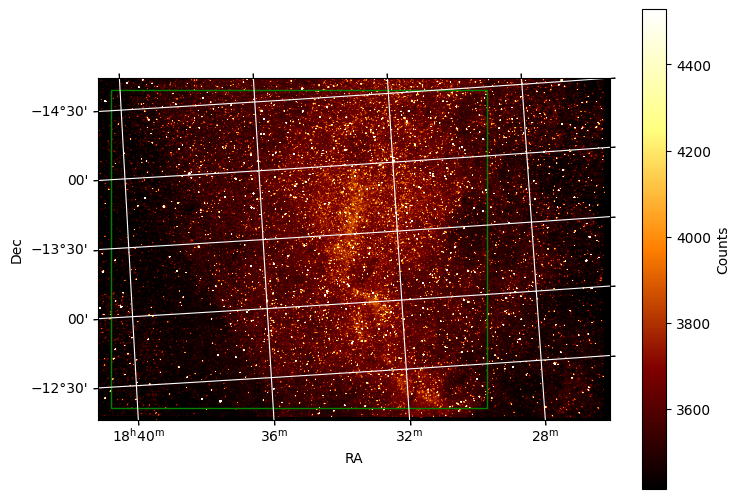

2558160


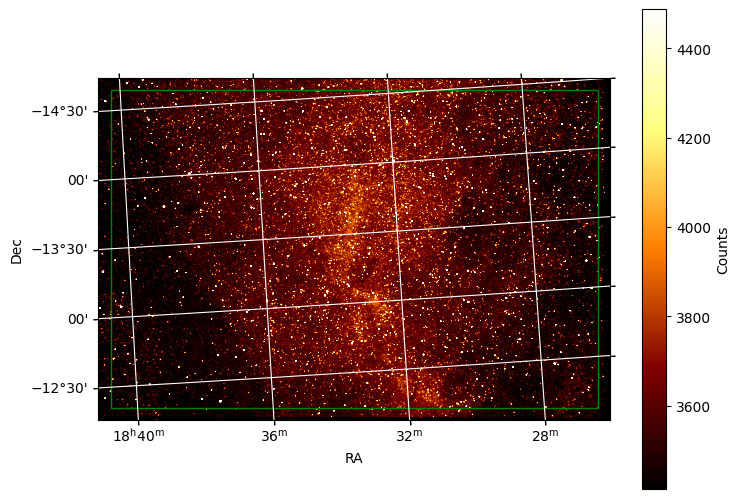

In [24]:
nb = Image('data/rim_Ha_wcs.fits')
# nb.cropCoords(dec_start='-13d', ra_start='18h28m')
nb.cropPixels(50, -500, 50, -50)
nb.plot(showCropped=True, croppedBorder='green', original=True)
nb.cropPixels(50, -50, 50, -50)
nb.plot(showCropped=True, croppedBorder='green')

nb.setSaturatedPixelsToNan()
bb.setSaturatedPixelsToNan()


### Testing plotting labelled stars

Previous saved catalog file found.
               RA        DEC  Vmag    x_pixels     y_pixels
90471  277.152829 -12.997444  8.34  895.710792   517.348531
90479  277.188261 -14.189341  9.16  830.332894  1183.684665
90491  277.222982 -12.960162  8.20  858.806557   493.849391
90514  277.299391 -14.565813  4.67  755.616157  1390.047472
90532  277.349480 -13.598391  8.45  765.229375   846.951944
90580  277.480059 -12.389438  9.19  740.007771   164.042201
90618  277.580429 -12.591274  8.88  677.335211   273.796445
90701  277.823601 -14.113973  8.75  487.888830  1118.212494
90708  277.832279 -13.108176  9.88  520.235421   554.761973
90715  277.846059 -12.337972  9.48  541.276123   122.017297
90918  278.461664 -14.425791  7.92  130.167691  1269.824660
90920  278.471287 -12.262881  9.54  201.093332    57.930702
90954  278.565689 -13.064835  8.24  121.106282   504.680666
90985  278.638600 -14.568655  7.73   29.215637  1343.467563
91006  278.696633 -13.434780  8.09   36.742092   707.406601
Empty

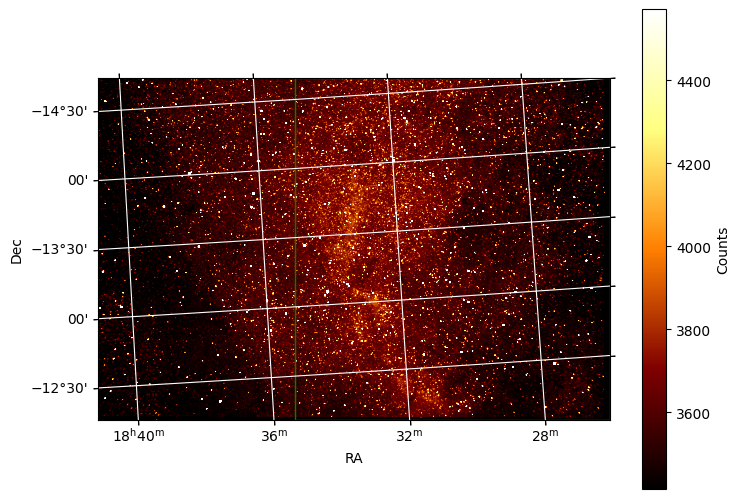

In [25]:
nb.cropPixels(x_start = 800)

filter = StarsFilter(data_directory_path="data")
filter.setStarsInRegion(nb)
print(filter.getStarsInRegion())
filter.setVisibleStars(nb)
print(filter.getVisibleStars())
nb.setLabeledStars(filter)

nb.plot(showCropped=True, croppedBorder='green', showLabeledStars=True)

### Testing Zoom Function

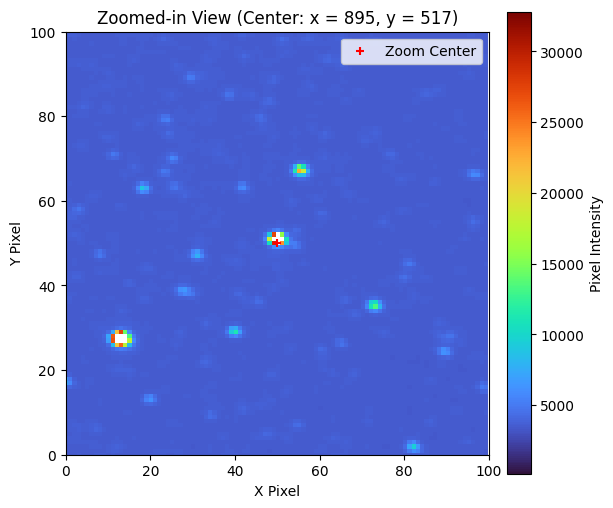

In [26]:
#Zooms into the point (200, 200) in x-y pixels
nb.zoomToPoint(x = 895, y = 517, custom_cmap = 'turbo')

### Testing getBounds

In [27]:
bl, br, tl, tr =nb.getBounds()
print(bl.to_string(style = 'hmsdms'))

18h35m22.29388068s -12d10m56.69916084s


### Testing Subtractor (VERY IMPORTANT!!!)

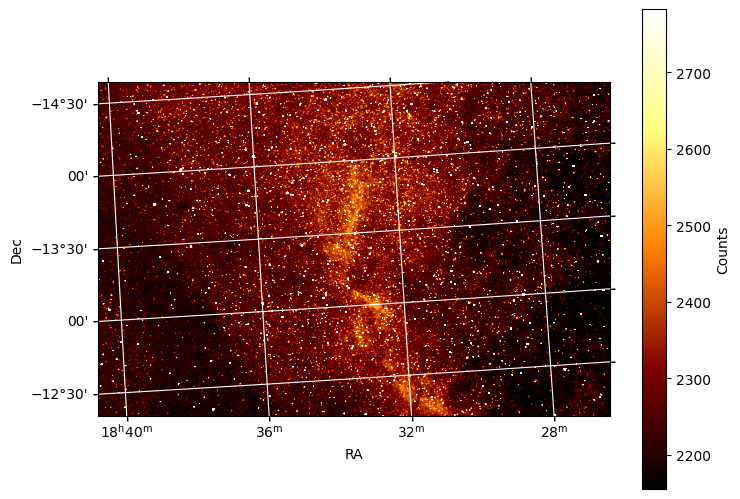

In [28]:
nb.cropPixels(50, -50, 50, -50)
bb.cropPixels(50, -50, 50, -50)

subtracted_image = Image.subtract(nb, bb, mu = 0.5)
subtracted_image.plot()

### Test Histogram plotting

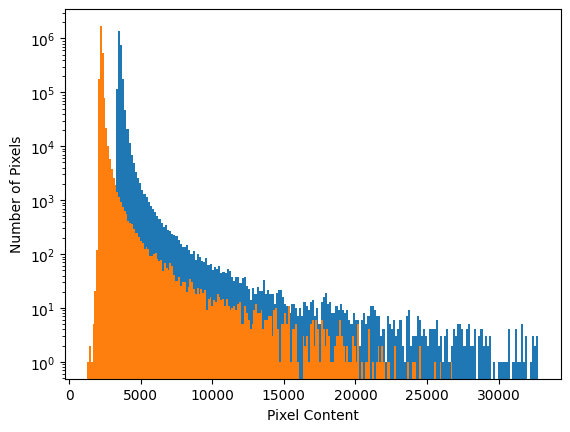

In [29]:
nb.plotHist()
subtracted_image.plotHist()

### Testing MuFinder constructor and finding optimal mus

In [30]:
finder = MuFinder(nb, bb, mu_resolution=0.05, mu_range=(0, 3))
print(finder.getOptimalMus())

60
0
[0.95056544 2.72396131]


### Plotting the skewness vs mu plot

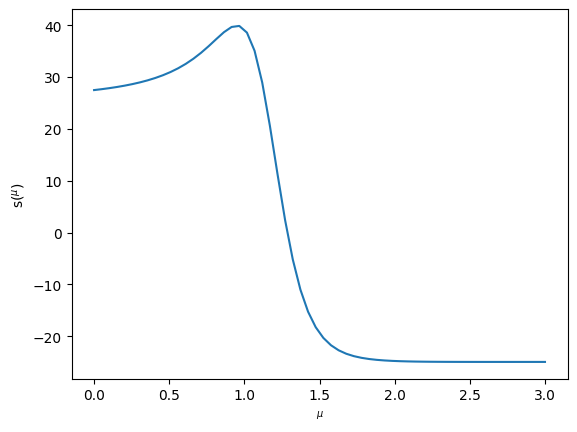

In [31]:
finder.plotSkewnessVals()

### Getting images from mufinder and plotting them with contours (DOUBLE CHECK)

0


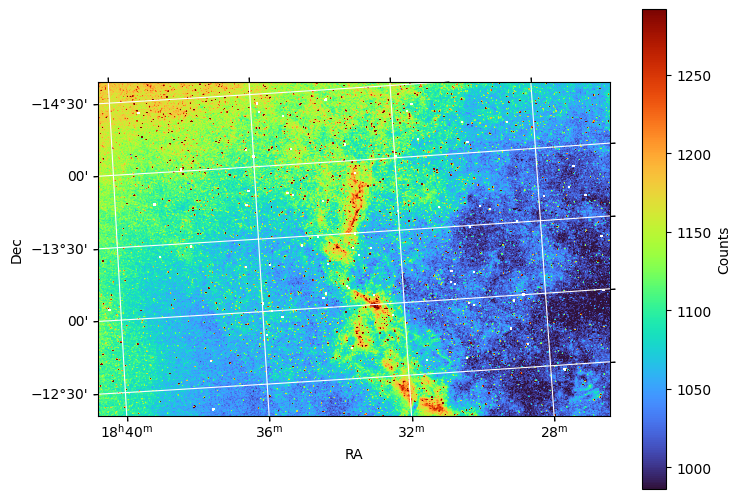

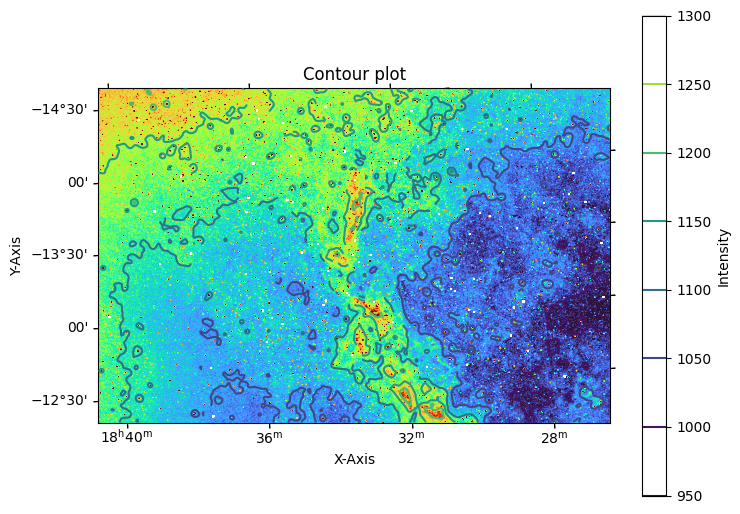

In [32]:
images = finder.getResultImages()
images[0].setSaturatedPixelsToNan()
plt.show()
images[0].plot(cmap='turbo')
images[0].plotContour(sigma = 9, overlay=True, base_cmap='turbo', alpha=1)

# Stars Filter Class

### Test setting a catalogue, either default or custom

In [33]:
hipparcus_filter = StarsFilter(data_directory_path="data") #Default
tycho_filter = StarsFilter(data_directory_path="data") #Custom

hipparcus_filter.setCatalogue()
print(hipparcus_filter.getCatalogue())
tycho_filter.setCatalogue(catalogue_id="I/259/tyc2", ra_col_name="RA(ICRS)", dec_col_name="DE(ICRS)", app_mag_col_name="VTmag")
print(tycho_filter.getCatalogue())

Previous saved catalog file found.
                RA        DEC  Vmag
0         0.000899   1.089009  9.10
1         0.004265 -19.498840  9.27
2         0.005024  38.859279  6.61
3         0.008629 -51.893546  8.06
4         0.009973 -40.591202  8.55
...            ...        ...   ...
118213  359.963738  11.673714  6.99
118214  359.974304 -22.428113  8.23
118215  359.976109   5.956552  7.59
118216  359.979458 -64.372313  9.20
118217  359.979078 -65.577132  4.49

[118218 rows x 3 columns]
Previous saved catalog file found.
                 RA        DEC    Vmag
0          2.317542   2.231864  12.146
1          1.125519   2.267396   8.670
2          1.056924   1.897933  12.100
3          0.050866   1.771514  10.521
4          0.050376   1.771482  10.093
...             ...        ...     ...
2539908  344.257744 -88.312507  11.731
2539909  345.767874 -88.284033  12.480
2539910  341.197324 -88.538894  12.158
2539911  337.972190 -88.762908  10.470
2539912  355.960942 -88.834241  12.096

[2

### Set stars within given image/region

In [34]:
hipparcus_filter.setStarsInRegion(nb)
tycho_filter.setStarsInRegion(nb)

hipparcus_stars_in_region = hipparcus_filter.getStarsInRegion()
tycho_stars_in_region = tycho_filter.getStarsInRegion()

print(hipparcus_stars_in_region)
print(hipparcus_stars_in_region.shape)

print(tycho_stars_in_region)
print(tycho_stars_in_region.shape)

               RA        DEC   Vmag     x_pixels     y_pixels
90471  277.152829 -12.997444   8.34  1645.710792   467.348531
90479  277.188261 -14.189341   9.16  1580.332894  1133.684665
90491  277.222982 -12.960162   8.20  1608.806557   443.849391
90532  277.349480 -13.598391   8.45  1515.229375   796.951944
90580  277.480059 -12.389438   9.19  1490.007771   114.042201
90618  277.580429 -12.591274   8.88  1427.335211   223.796445
90701  277.823601 -14.113973   8.75  1237.888830  1068.212494
90708  277.832279 -13.108176   9.88  1270.235421   504.761973
90715  277.846059 -12.337972   9.48  1291.276123    72.017297
90918  278.461664 -14.425791   7.92   880.167691  1219.824660
90920  278.471287 -12.262881   9.54   951.093332     7.930702
90954  278.565689 -13.064835   8.24   871.106282   454.680666
91006  278.696633 -13.434780   8.09   786.742092   657.406601
91017  278.739880 -13.870108   9.52   748.183415   899.533402
91091  279.000567 -14.065581   7.21   599.711133   999.929601
91111  2

### Plot Hist of Star

IMAGE 1, Brightest pixel within range:  29180.0
IMAGE 2, Brightest pixel within range:  32513.0


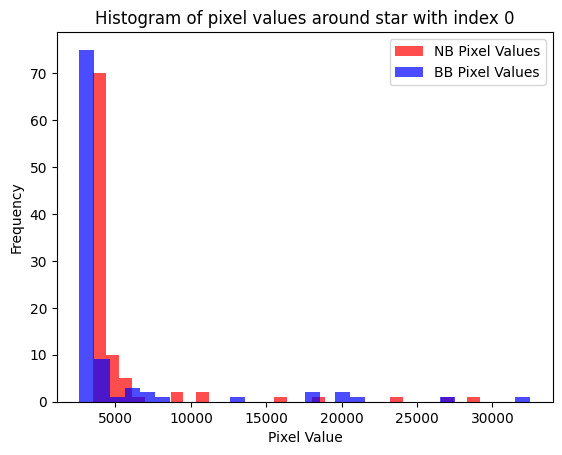

In [35]:
hipparcus_filter.plotHistOfStar(0, nb, bb, print_brightest_pixels=True)

### Test Setting visible stars

In [36]:
hipparcus_filter.setVisibleStars(nb, print_results=True)
hipparcus_visible_stars = hipparcus_filter.getVisibleStars()
tycho_filter.setVisibleStars(nb)

print(hipparcus_visible_stars)
print(hipparcus_visible_stars.shape)

Covariance of the parameters could not be estimated
Covariance of the parameters could not be estimated
Covariance of the parameters could not be estimated
Covariance of the parameters could not be estimated
Covariance of the parameters could not be estimated
Covariance of the parameters could not be estimated
Covariance of the parameters could not be estimated
Covariance of the parameters could not be estimated
Covariance of the parameters could not be estimated
Covariance of the parameters could not be estimated
Covariance of the parameters could not be estimated


               RA        DEC  Vmag     x_pixels     y_pixels
90471  277.152829 -12.997444  8.34  1645.710792   467.348531
90491  277.222982 -12.960162  8.20  1608.806557   443.849391
90532  277.349480 -13.598391  8.45  1515.229375   796.951944
90918  278.461664 -14.425791  7.92   880.167691  1219.824660
90954  278.565689 -13.064835  8.24   871.106282   454.680666
91091  279.000567 -14.065581  7.21   599.711133   999.929601
91194  279.279848 -12.902743  9.71   486.152466   339.577407
91231  279.386846 -12.349872  6.95   445.827968    25.814202
91266  279.480759 -13.472964  7.35   357.675413   652.335363
91286  279.518668 -14.004781  6.49   319.833378   948.588011
91345  279.680117 -12.612964  9.69   276.428717   163.835575
91394  279.858766 -13.846435  9.86   139.655851   848.917565
(12, 5)


Covariance of the parameters could not be estimated


### Test removing visible stars from given image

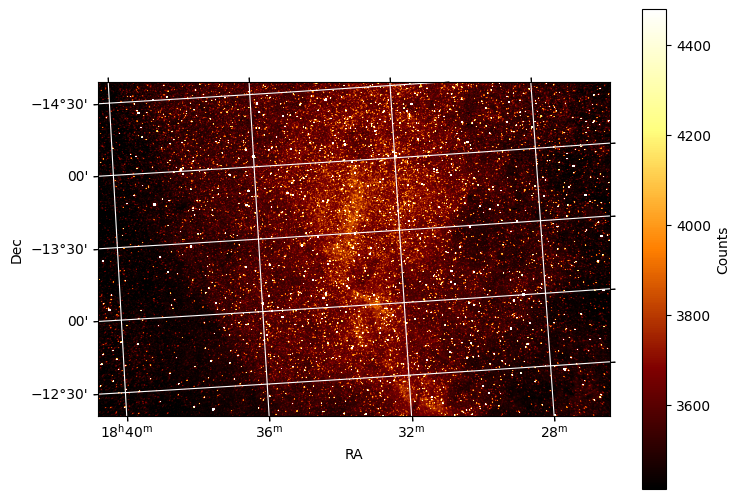

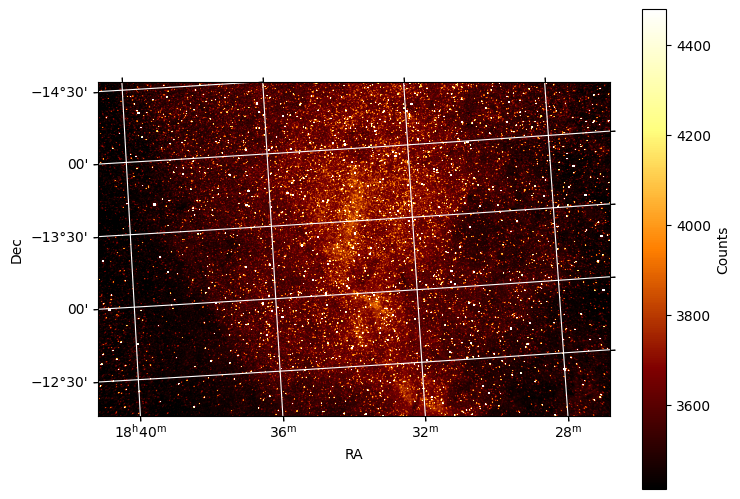

In [37]:
filtered_nb = hipparcus_filter.removeVisibleStars(nb)

plt.show()
nb.plot(showLabeledStars = True)

filtered_nb.plot(showLabeledStars = True, original = True)